<a href="https://www.kaggle.com/code/dhanyathas/machine-learning-models?scriptVersionId=273930781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#### Learning Machine Learning with all the models explained 

Step 1: Import dataset / or create dataset

What are the actual steps to do when we have a data
step 2: Data Preprocess

Step 3: Define data features

step 4: split the dataset 

step 5: train the dataset

step 6: pridict the data

step 7: Evaluate the prediction


#####  Scikit learn:  
A machine learning library built on top of numpy (for neumarical computation), Pandas (for handling datsets), Matplotlib/Seaborn (for visualization)

workflow of most of the models using this libary (scikit-learn or sklearn)  

1. import libary with packages: from sklearn.model import ModelName  
and supported models too like  
-> from sklearn.model_selection import train_test_split  
-> from sklearn.metrics import mean_squared_error, r2_score  

2. Once imported workflow follows as   
model = ModelName(parameters)  
model.fit(x_train. y_train)  
prediction = model.pridict(x_test)  
evaluate = metrics(y_test, prediction)  

evaluation metrics — functions that quantify how good or bad your model’s predictions are.
mean_squared_error() tells you how far off your predictions are, on average.

r2_score() tells you how well your model explains the variation in data.


#### Model 1: 
##### Linear Regression 
(it learns from data)  
it has a formual:    
    Y = mX + b  
where y is output,  
      x is input,  
      m is the coefficient,  
      b is intercept 
what it does is it draws the linear line on the predicted features making it fit for minimum mena_squared_errors and and finds the bets coefficient and intercept w and b.

"Learning" in ml is finding numbers that best minimize defined error.  

In Linear Regression:  

Learning = Finding best w and b    
Understanding = Fitting the pattern that minimizes MSE  
Output = A mathematical function that generalizes unseen data  

when we use the Linear regression model  
```
modle = LinearRegression()
```
 ---> defined as a empty class of the liner regression (It hasn’t seen any data yet — just like creating an empty adjacency list before inserting nodes.)  
where in which w and b will be   

```
self.coef_ = None   # slope(s)
self.intercept_ = None  # bias
self.fit_intercept = True  # whether to include intercept term
self.copy_X = True   # whether to copy the data or use it directly
```

when we make fit(x,y) to train the data, our models now begins to learn the data 
it checks the spape of the x and y feature and lables repectively   

This "Linear Regression is deined by Ordinalry Least Square Algorithm.   


            min n
            w,b ∑ = (yi - (w * Xi + b))^ 2
               i=1


finds the coefficent w and intercept b that minimize thesum of sqaured differences between prediction and actual output

in ML code :  prediction = mertics(y_test, predictions)

##### Computing the Intercept  

If fit_intercept=True, sklearn internally centers the data:  
    X′=X−mean(X)  
    y′=y−mean(y)  
It fits w using these centered values, then computes:  
    b=mean(y)−mean(X)∗w

Now self.coef_ and self.intercept_ are stored.

""Model learned!""

In [2]:
## Smaple Example on Linear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # how far and how much variation the data is and has?

#step 1 create dataset
data = {
    "square_feet": [1000, 1500, 1800, 2400, 3000],
    "price": [200000, 250000, 280000, 350000, 400000]
}

#Step 2: create dataset
df = pd.DataFrame(data)
df

,square_feet,price
0,1000,200000
1,1500,250000
2,1800,280000
3,2400,350000
4,3000,400000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predictions: [251621.00456621]
Mean Squared Error: 2627655.8036737707
R² Score: nan


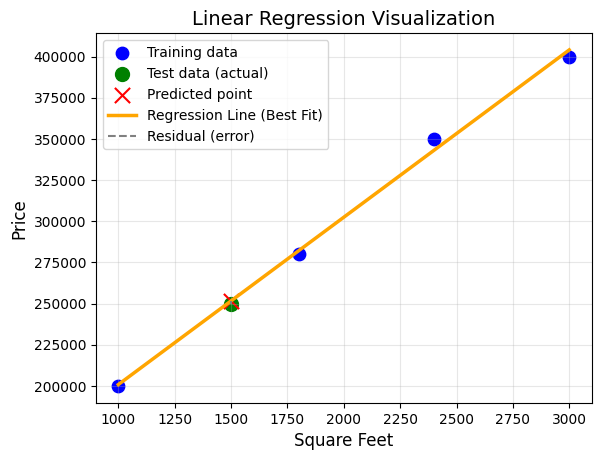

In [3]:
# step 3: Define the data
x = df[["square_feet"]] #2d  -- Feature
y = df["price"] # -- Label

#step 4: split the datasets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) # 20% of your dataset will be kept aside as the test set
# This controls the random shuffling of your data before splitting. and 42 is popular calculation


#step 5: train model
model = LinearRegression()
model.fit(x_train,y_train)

#step 6: Predict the data
y_pred = model.predict(x_test)

#step 7: Evalauate the prediction
# to know how far off our prediction is from actual data and how well model explains the variations in data

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Predictions:", y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of training data
plt.scatter(x_train, y_train, color='blue', label='Training data', s=80)

# Scatter plot of test data
plt.scatter(x_test, y_test, color='green', label='Test data (actual)', s=100)

# Predicted point for test data
plt.scatter(x_test, y_pred, color='red', label='Predicted point', s=120, marker='x')
# Regression line
x_line = np.linspace(df["square_feet"].min(), df["square_feet"].max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='orange', linewidth=2.5, label='Regression Line (Best Fit)')

# Residual line (error line) between actual test and predicted point
for i in range(len(x_test)):
    plt.plot([x_test.iloc[i], x_test.iloc[i]], [y_test.iloc[i], y_pred[i]],
             color='gray', linestyle='--', linewidth=1.5, label='Residual (error)' if i == 0 else "")

# Titles and labels
plt.title("Linear Regression Visualization", fontsize=14)
plt.xlabel("Square Feet", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Explation over the Example
we are finding 

m = slope (how much price changes per 1 sq.ft)

b = intercept (price when sq.ft = 0)

The .fit() function calculates m and b using the Ordinary Least Squares (OLS) method.

That means it minimizes the squared difference between the predicted and actual prices.
> R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)


This measures how well your model explains the variance in data.

Formula:

        R2=1−SStot
            ------
             SSres
𝑆
𝑆
𝑟
𝑒
𝑠
=
∑
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
SSres → residual sum of squares
SStot​ → total variance in actual data

Intuitive Meaning:

R² = 1 → Perfect prediction

R² = 0 → Model is no better than predicting the mean

R² < 0 → Model is worse than predicting the mean

R² = NaN → Not defined (invalid case)

Why R² = NaN in our Case

Here’s the key part:

we've only have one test sample (because of test_size=0.2 on 5 rows).

R² requires at least 2 data points to compute variance (SS_tot).
With only one data point, variance is zero — you can’t divide by zero — so it returns NaN (Not a Number).

so the prediction is
| Data Type | Square Feet | Actual Price (y_test) | Predicted Price (y_pred) | Difference |
| --------- | ----------- | --------------------- | ------------------------ | ---------- |
| Test Data | 1500        | 250000                | 251621.00                | +1621      |


In [4]:
# lets predict the with new data
# new_sq_feet = [[2150]]
# y_pred = model.predict(new_sq_feet)
# print(f"New prediction", y_pred)
#result --  New prediction [317659.8173516]

# new_sq_feet = [[100]]
# y_pred = model.predict(new_sq_feet)
# print(f"New prediction", y_pred)

# Result -- New prediction [109383.56164384]

new_sq_feet = [[2]]
y_pred = model.predict(new_sq_feet)
print(f"New prediction", y_pred)

New prediction [99426.94063927]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


BOSTON HOUSING PREDICTION 

In [5]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [6]:
# Check dataset keys
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
import pandas as pd
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [9]:
df.shape


(20640, 8)

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [14]:
df['MedHouseValue'] = housing.target
df['MedHouseValue']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseValue, Length: 20640, dtype: float64

In [15]:
# define the data points
X = df.drop('MedHouseValue', axis=1)     # feature
y = df['MedHouseValue']                  # lables

In [16]:
#  split the data points
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#### Linear Regression

In [17]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred_lm = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test,y_pred_lm)
r2 = r2_score(y_test, y_pred_lm)


In [20]:
print(f"Prediction: ",y_pred_lm)
print(f"MSE:", mse)
print(f"R2 Score: ",mse)

Prediction:  [0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
MSE: 0.5558915986952444
R2 Score:  0.5558915986952444


In [21]:

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': model.predict(X_test)
})

results.head(10)

,Actual,Predicted
20046,0.47700,0.719123
3024,0.45800,1.764017
15663,5.00001,2.709659
20484,2.18600,2.838926
9814,2.78000,2.604657
13311,1.58700,2.011754
7113,1.98200,2.645500
7668,1.57500,2.168755
18246,3.40000,2.740746
5723,4.46600,3.915615


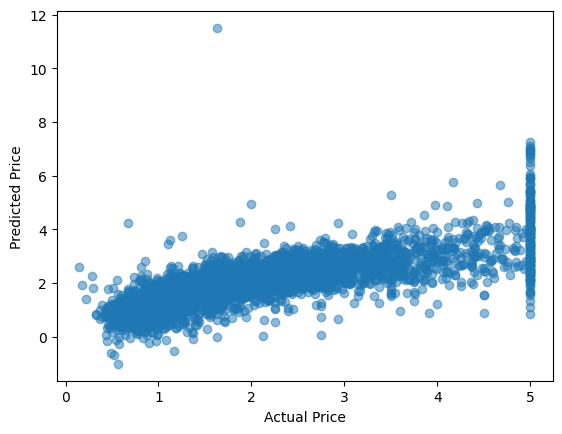

In [22]:

plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


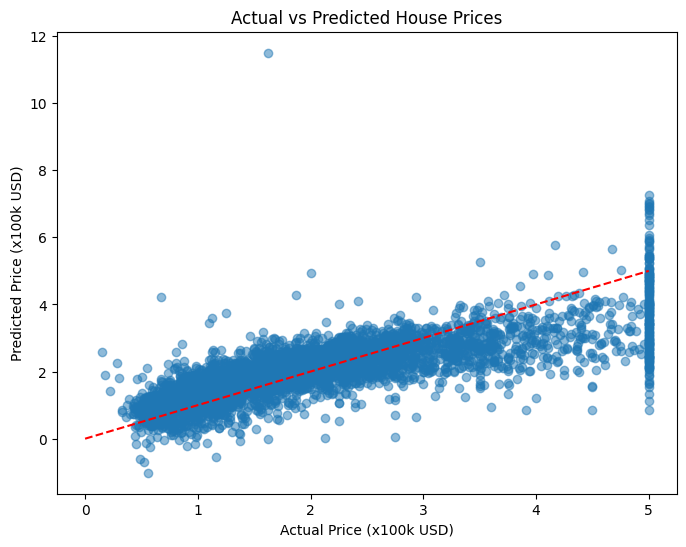

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, model.predict(X_test), alpha=0.5)
plt.plot([0,5],[0,5], color='red', linestyle='--')  # perfect prediction line
plt.xlabel("Actual Price (x100k USD)")
plt.ylabel("Predicted Price (x100k USD)")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [24]:
#  to get actual price units
results = pd.DataFrame({
    'Actual_Price_USD': y_test * 100000,
    'Predicted_Price_USD': y_pred_lm * 100000
})

print(results.head(10))

       Actual_Price_USD  Predicted_Price_USD
20046           47700.0         71912.284160
3024            45800.0        176401.657066
15663          500001.0        270965.883343
20484          218600.0        283892.593018
9814           278000.0        260465.725181
13311          158700.0        201175.367325
7113           198200.0        264550.004938
7668           157500.0        216875.532129
18246          340000.0        274074.644114
5723           446600.0        391561.472503


In [25]:
results['Error'] = abs(results['Actual_Price_USD'] - results['Predicted_Price_USD'])
results.sort_values(by='Error', ascending=False).head(10)


,Actual_Price_USD,Predicted_Price_USD,Error
1979,162500.0,1.150033e+06,987533.102590
6688,500001.0,8.516218e+04,414838.819536
10574,500001.0,1.115227e+05,388478.255332
12389,500001.0,1.319954e+05,368005.569037
19542,450000.0,8.672162e+04,363278.379433
4548,67500.0,4.236215e+05,356121.466688
459,500001.0,1.547530e+05,345247.950988
15652,500001.0,1.642870e+05,335713.976937
12069,500001.0,1.668034e+05,333197.600862
4630,500001.0,1.711156e+05,328885.438458



### Model 2:Unsupervised Learning : kMeans


Major differebce between supervised learning and unsupervised learning is that one uses lables one doesn't,   
role:   
      Supervised learning   
      --> is to make predictions,   
      --> You train them with labled data so that they take future inputs to make predictions for them.    
      

     Unsupervised Learning
     --> Provides Insights to the existing data
     --> Groups them into categories (clusturing) by similarities

KMeans:  
“K” = number of clusters  

“Means” = taking the mean of points to update centroids  

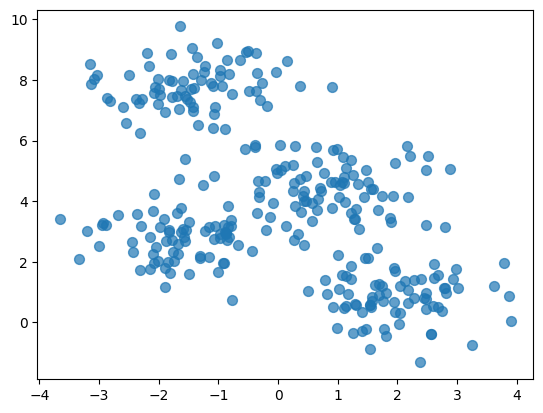

In [26]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


points, cluster_indexes  = make_blobs(n_samples = 300, centers = 4, cluster_std=.8, random_state = 0)
x = points[:,0]
y = points[:,1]
plt.scatter(x,y, s=50,alpha = .7)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


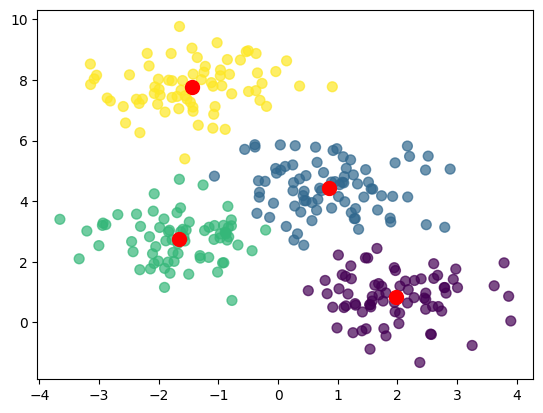

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(points)
predicted_cluster_indexes = kmeans.predict(points)

plt.scatter(x,y, c = predicted_cluster_indexes, s = 50,alpha = .7, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c='red', s=100)

fit() means “run the K-Means algorithm” on your data.

Internally:

Randomly picks 4 centroids.

Assigns each point to nearest centroid.

Updates centroids.

Repeats until convergence or max_iter reached.

After fitting:

The model learns:

kmeans.cluster_centers_: the coordinates of 4 centroids.

kmeans.labels_: predicted cluster index (0–3) for each point.
predict() assigns each data point to its nearest centroid (based on the fitted centroids).
```
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100)
```

centers → a (4, 2) array containing coordinates of 4 cluster centroids.
if you have 4 clusters, you’ll have 4 centroids, each defined by 2 coordinates  
centroieds means its the mean (avg)  

Plotted as red dots (c='red', s=100).

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

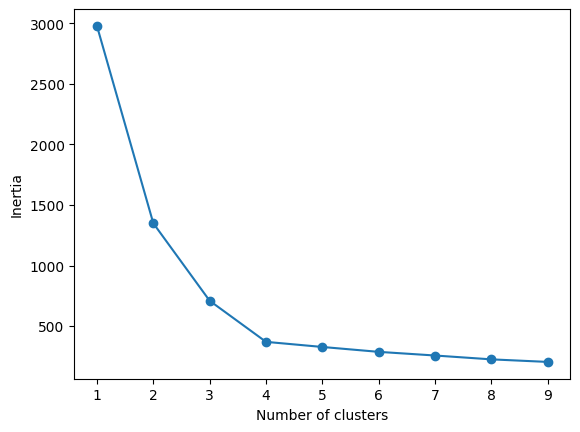

In [28]:
points, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,10),inertias,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


Imagine you’re trying to group your 300 students into discussion groups:  

        With 1 cluster, everyone’s in one big messy group → high inertia.  
        
        With 2–4 clusters, groups become tighter and more meaningful → inertia drops fast.  
        
        After 4 clusters, making more groups doesn’t improve much — you’re over-splitting the class.  

So you pick K = 4 as the sweet spot — compact, efficient, and not overcomplicated.  

| Question                 | Answer                                                                         |
| ------------------------ | ------------------------------------------------------------------------------ |
| What does the plot show? | How clustering compactness (inertia) changes with number of clusters (K)       |
| What do we get from it?  | The **optimal K** value (where the curve bends)                                |
| Why is it useful?        | Helps avoid underfitting (too few clusters) or overfitting (too many clusters) |


You use this plot to decide how many clusters (K) make the most sense for your data.   
The “elbow point” is your best K — where adding more clusters doesn’t significantly reduce inertia.    

| Observation                                     | Meaning                                                   |
| ----------------------------------------------- | --------------------------------------------------------- |
| Inertia is **very high** (steep drop initially) | Too few clusters — poor grouping                          |
| Inertia **drops sharply** (early part)          | Adding clusters really improves compactness               |
| Inertia **starts flattening**                   | You’re finding the natural grouping                       |
| After the **bend (elbow)**, line is almost flat | More clusters barely improve fit — you’re over-segmenting |

Think of inertia like the average unhappiness of your points being grouped together.

    Fewer clusters → points complain: “I’m far from my group center!” 😤 → high inertia  
    
    More clusters → points are happier: “I’m close to my center!” 😌 → lower inertia  
    
    Too many clusters → everyone’s in tiny groups → no new happiness → inertia barely drops anymore 😐  

So the elbow = “Everyone’s happy enough; stop splitting!”

### Lets do solve a real world prblem on customer segmentation  to identify the one who are to get promotions

In [29]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)

# no. of customers
n_customers = 200

customers = pd.DataFrame({
    'customerID': range(1,n_customers + 1),
    'Gender':np.random.choice(['Male','Female'], size=n_customers),
    'Age': np.random.randint(18,70,size = n_customers),
    'Annual Income (k$)': np.random.randint(15, 140, size=n_customers),
    'Spending Score (1-100)': np.random.randint(1, 101, size=n_customers)
})

customers.head()

,customerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,49,68,86
1,2,Female,56,22,57
2,3,Male,66,41,29
3,4,Male,69,41,78
4,5,Male,49,112,92


In [30]:
customers.shape

(200, 5)

Text(0, 0.5, 'Spending Score')

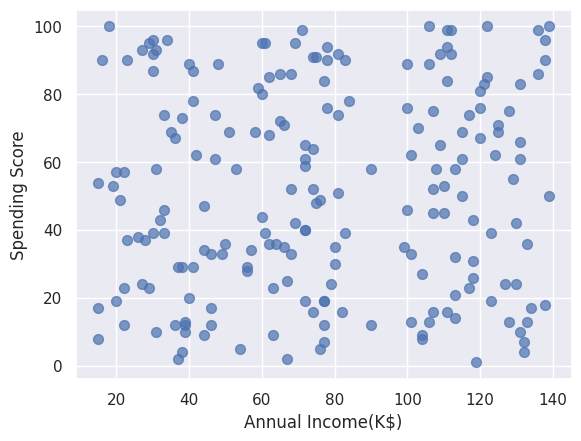

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


points = customers.iloc[:, 3:5].values
# Selects all rows (:) and columns from index 3 up to 5 (not including 5) — i.e., columns 3 and 4.
# Converts the selected part of the DataFrame into a NumPy array that K-Means can work with.
x = points[:,0]
y = points[:,1]
plt.scatter(x,y,s=50,alpha=.7)
plt.xlabel("Annual Income(K$)")
plt.ylabel("Spending Score")


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

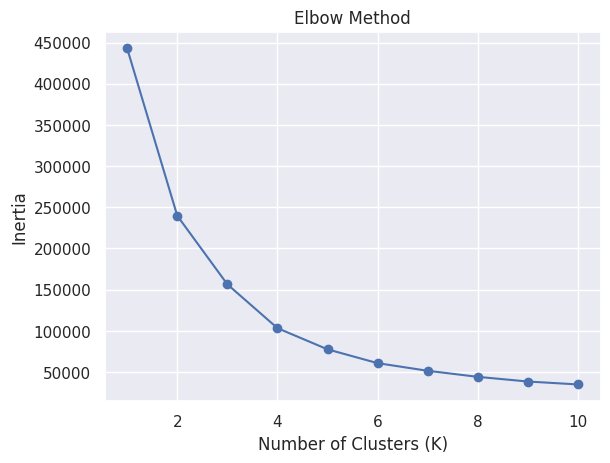

In [32]:
# Lets do elbow method

inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Now cluster the datat with k = 4

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


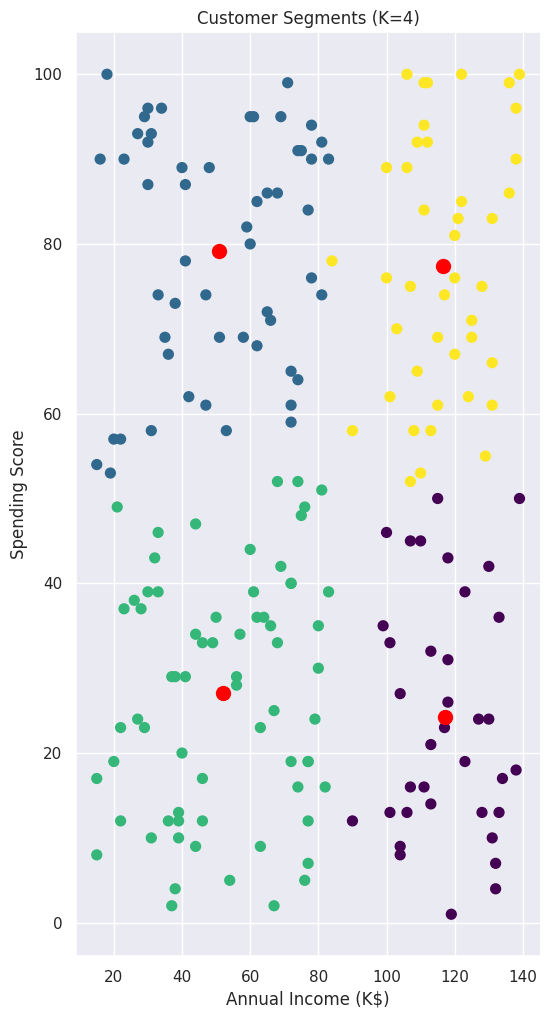

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state =0)
kmeans.fit(points)

predicted_clusters  = kmeans.predict(points)

plt.figure(figsize=(6,12))
plt.scatter(points[:,0], points[:,1], c=predicted_clusters, s= 50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='red',s=100,marker='o')
plt.xlabel("Annual Income (K$)")
plt.ylabel("Spending Score")
plt.title("Customer Segments (K=4)")
plt.show()

```
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_points = scaler.fit_transform(points)

kmeans = KMeans(n_clusters=4, random_state=0)
predicted_clusters = kmeans.fit_predict(scaled_points)

plt.figure(figsize=(6,4))
plt.scatter(scaled_points[:,0], scaled_points[:,1], c=predicted_clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=100, marker='X')
plt.title("Clusters after Feature Scaling (Standardized Data)")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.show()


```

In plot, the clusters (by color) aren’t tightly packed; they look widely spread out.  
This happens due to a few possible reasons:  

(a) The features are on different scales or distributions  

Even though both Annual Income and Spending Score seem numerical, their value ranges differ:  

Annual Income = roughly 15–140  

Spending Score = 1–100  

That’s not too bad, but still enough to affect Euclidean distances, which K-Means relies on.  
If one feature dominates (like Income), it can distort cluster shapes.  

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


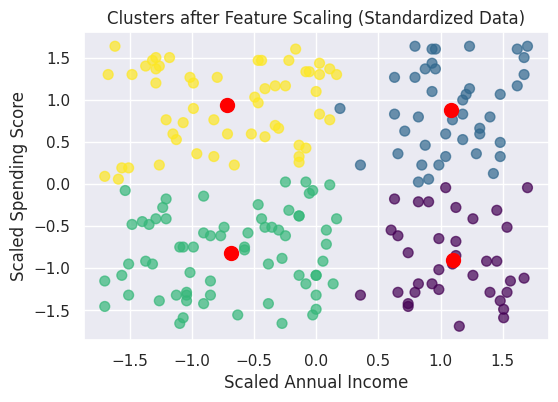

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scaler = StandardScaler()
scaled_points = scaler.fit_transform(points)

kmeans = KMeans(n_clusters=4, random_state=0)
predicted_clusters = kmeans.fit_predict(scaled_points)

plt.figure(figsize=(6,4))
plt.scatter(scaled_points[:,0], scaled_points[:,1], c=predicted_clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=100, marker='o')
plt.title("Clusters after Feature Scaling (Standardized Data)")
plt.xlabel("Scaled Annual Income")
plt.ylabel("Scaled Spending Score")
plt.show()

| Cluster           | Annual Income | Spending Score | Likely Segment                                   |
| ----------------- | ------------- | -------------- | ------------------------------------------------ |
| 🟢 (bottom-left)  | Low           | Low            | Budget-conscious, low spenders                   |
| 🟣 (bottom-right) | High          | Low            | **High-income but low-spending → Target group!** |
| 🟡 (top-left)     | Low           | High           | Value shoppers (low income, high spend)          |
| 🔵 (top-right)    | High          | High           | Loyal or luxury spenders                         |


In [35]:
# find which cluster corresponds to high income + low spending using the cluster centroids.
centers = kmeans.cluster_centers_

centroid_df = pd.DataFrame(centers, columns=["Annual_Income_scaled", "Spending_Score_scaled"])
print(centroid_df)

   Annual_Income_scaled  Spending_Score_scaled
0              1.102781              -0.904277
1              1.082215               0.881888
2             -0.682884              -0.812692
3             -0.716982               0.940328


In [36]:
# Extract those customers
customers["Cluster"] = predicted_clusters

traget_customers = customers[customers['Cluster']== 0] # Select customers belonging to cluster 0 (high income, low spending)

traget_customers.head()


,customerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
11,12,Male,32,111,16,0
27,28,Female,61,131,10,0
31,32,Male,28,119,1,0
34,35,Female,56,107,16,0
35,36,Male,50,127,24,0


In [37]:
traget_customers.shape

(36, 6)

In [38]:
traget_customers['customerID'].values

array([ 12,  28,  32,  35,  36,  40,  43,  45,  46,  48,  58,  61,  64,
        70,  72,  76,  81,  83, 100, 102, 137, 140, 142, 145, 152, 157,
       160, 163, 164, 165, 178, 179, 182, 183, 193, 194])

In [39]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 8.7+ KB


Now we are heding to segment these data  into 2D  
so, we've the "gender col" in string convert it to numbers by encoding it by giving 1 and 0 for male and female


In [40]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,customerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,49,68,86,3
1,2,0,56,22,57,3
2,3,1,66,41,29,2
3,4,1,69,41,78,3
4,5,1,49,112,92,1


Let's not forget we are finding optimum no. of custers by using "elbowMethod" --> kmeans.inertia_  

slice it from col 1 to 5  
Slicing ---> [First Position (:), Starting Index (1), Ending Index (-1)]  
df.iloc[:,1:-1].values

why because we have clusters in the last row

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

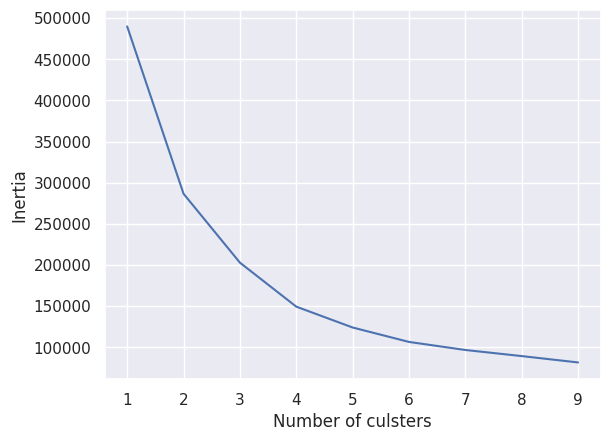

In [41]:
points = df.iloc[:, 1:-1].values
inertias = []

for i in range(1,10):
    kmeans = KMeans(n_clusters  = i, random_state = 0)
    kmeans.fit(points)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias)
plt.xlabel("Number of culsters")
plt.ylabel("Inertia")


In [42]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(points)

df['Clusters'] = kmeans.predict(points)
df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clusters
0,1,1,49,68,86,3,0
1,2,0,56,22,57,3,0
2,3,1,66,41,29,2,2
3,4,1,69,41,78,3,0
4,5,1,49,112,92,1,1


Each number in the Clusters column represents the group (or segment) that K-Means assigned this customer to.  
Since you chose n_clusters=4, there are 4 groups → labeled 0, 1, 2, and 3.  
| Cluster Number | Meaning (you’ll interpret this using centroid values)       |
| -------------- | ----------------------------------------------------------- |
| 0              | One customer segment (e.g., low-income, high-spending)      |
| 1              | Another customer segment (e.g., high-income, high-spending) |
| 2              | Another segment (e.g., low-income, low-spending)            |
| 3              | Another segment (e.g., middle-income, high-spending)        |

The numbers 0–3 are arbitrary labels — they don’t have any built-in meaning.
You interpret them by examining the cluster centroids (the kmeans.cluster_centers_).


In [43]:
# Select only the columns used in KMeans
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(centroids)




     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.464286  48.910714           53.964286               78.464286
1  0.512195  43.000000          117.292683               77.414634
2  0.477612  42.059701           50.074627               26.820896
3  0.583333  43.361111          117.250000               24.305556


So Cluster 3 has our requirements here -- High Income Low Spenidng lets have them promoted




In [44]:
target_customers_for_promotion = df[df['Clusters']==3]
target_customers_for_promotion.head()

,customerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clusters
11,12,1,32,111,16,0,3
27,28,0,61,131,10,0,3
31,32,1,28,119,1,0,3
34,35,0,56,107,16,0,3
35,36,1,50,127,24,0,3


In [45]:
target_customers_for_promotion.shape

(36, 7)

In [46]:
target_customers_for_promotion

,customerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Clusters
11,12,1,32,111,16,0,3
27,28,0,61,131,10,0,3
31,32,1,28,119,1,0,3
34,35,0,56,107,16,0,3
35,36,1,50,127,24,0,3
39,40,1,30,113,32,0,3
42,43,0,56,130,24,0,3
44,45,0,25,139,50,0,3
45,46,0,44,99,35,0,3
47,48,1,54,101,33,0,3


In [47]:
# target_customers.to_csv("high_income_low_spending.csv", index=False)
# 